In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, MaxPooling2D, Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/MyDrive/Clean_docs/text_cleaning.zip'

In [ ]:
# чтобы проверить все ли изображения одинакового размера и какие вообще есть размеры просмотрим изображения
imagesList = os.listdir('/content/text_cleaning/train_X/')
size = {}
for image_ in imagesList:
  im = Image.open('/content/text_cleaning/train_X/' + image_)
  (width, height) = im.size
  str_size = ''.join(str(im.size))
  if str_size in size:
    size[str_size] += 1
  else: size[str_size] = 1
print(size)

{'(540, 420)': 96, '(540, 258)': 48}


In [ ]:
# Т.к. есть 2 размера изображений с текстом нужно привести все изображения к единому размеру - я решила привести к  максимальному 540, 420
# но при этом я решила сохранить исходное изображение, поэтому будут создаваться изображения с белым фоном 540 на 420 и в них вставляться оригинальные изображения
imagesList = os.listdir('/content/text_cleaning/train_X/')
size = {}
list_images = [] # список для загрузки изображений
for image_ in imagesList:
  im = image.load_img(os.path.join('/content/text_cleaning/train_X/', image_), color_mode='grayscale')
  # дополнительно изображения немного осветляются и увеличивается констраст и резкость
  im = ImageEnhance.Sharpness(im).enhance(0.5)
  im = ImageEnhance.Contrast(im).enhance(1.3)
  im = ImageEnhance.Brightness(im).enhance(1.1)
  image_white = Image.new('RGB', (540, 420), 'white')
  image_white.paste(im, (0, 0))
  list_images.append(image.img_to_array(image_white))

images_x = np.array(list_images)
images_x = images_x/255

In [ ]:
# аналогично нужно подготовить изображения для проверки
imagesList = os.listdir('/content/text_cleaning/train_Y/')
size = {}
list_images_y = [] # список для загрузки изображений
for image_ in imagesList:
  im = image.load_img(os.path.join('/content/text_cleaning/train_Y/', image_), color_mode='grayscale')
  image_white = Image.new('RGB', (540, 420), 'white')
  image_white.paste(im, (0, 0))
  list_images_y.append(image.img_to_array(image_white))

images_y = np.array(list_images_y)
images_y = images_y/255

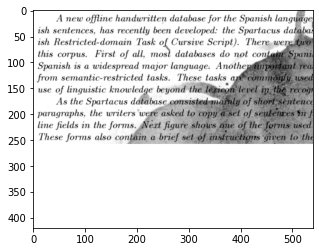

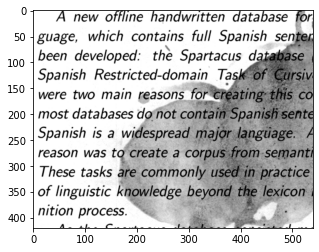

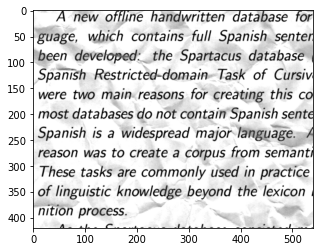

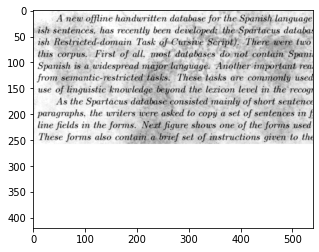

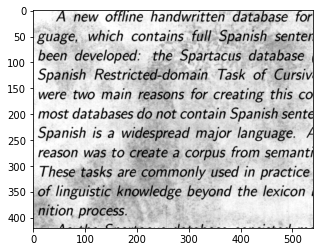

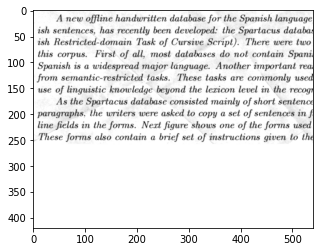

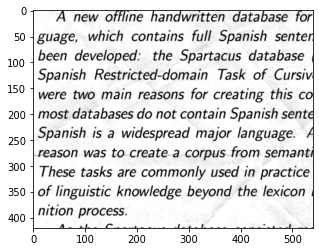

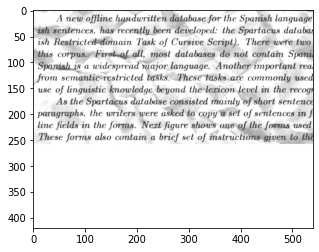

In [ ]:
# аналогично нужно подготовить изображения для теста
imagesList = os.listdir('/content/text_cleaning/test/')
size = {}
list_images_test = [] # список для загрузки изображений
for image_ in imagesList:
  im = image.load_img(os.path.join('/content/text_cleaning/test/', image_), color_mode='grayscale')
  im = ImageEnhance.Sharpness(im).enhance(0.5)
  im = ImageEnhance.Contrast(im).enhance(1.3)
  im = ImageEnhance.Brightness(im).enhance(1.1)
  image_white = Image.new('RGB', (540, 420), 'white')
  image_white.paste(im, (0, 0))
  plt.imshow(image_white)
  plt.show()
  list_images_test.append(image.img_to_array(image_white))

images_test = np.array(list_images_test)
images_test = images_test / 255

In [ ]:
# функция создания модели
def Clean_docs():
    img_input = Input((420,540,3))

    x = Conv2D(16,  (3), activation='relu', padding='same')(img_input)
    x = MaxPooling2D(2)(x)
    x = Conv2D(16,  (3), activation='relu', padding='same')(x)
    x = UpSampling2D(2)(x)
    x = Conv2D(16,  (3), activation='relu', padding='same')(x)
    x = MaxPooling2D(2)(x)
    x = Conv2D(16,  (3), activation='relu', padding='same')(x)
    x = UpSampling2D(2)(x)
    x = Conv2D(16,  (3), activation='relu', padding='same')(x)
    x = Conv2D(3,   (3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(0.0005, 0.5), loss='mse')

    return model

In [ ]:
# создаем модель и обучаем
model_clean_docs = Clean_docs()
# разделение на обучающую и валидационную выборку сплитом делать не стала и перемешивать выборку тоже, меня устроил и так результат обучения в виду того, что это просто тестовое задание
model_clean_docs.fit(images_x[:120], images_y[:120], epochs=30, batch_size=20, validation_data = (images_x[120:], images_y[120:]))

Epoch 1/30
6/6 [==============================] - 38s 877ms/step - loss: 0.2063 - val_loss: 0.1752
Epoch 2/30
6/6 [==============================] - 4s 757ms/step - loss: 0.1336 - val_loss: 0.0772
Epoch 3/30
6/6 [==============================] - 4s 753ms/step - loss: 0.0640 - val_loss: 0.0630
Epoch 4/30
6/6 [==============================] - 4s 759ms/step - loss: 0.0591 - val_loss: 0.0605
Epoch 5/30
6/6 [==============================] - 5s 764ms/step - loss: 0.0567 - val_loss: 0.0577
Epoch 6/30
6/6 [==============================] - 5s 770ms/step - loss: 0.0533 - val_loss: 0.0527
Epoch 7/30
6/6 [==============================] - 5s 763ms/step - loss: 0.0477 - val_loss: 0.0469
Epoch 8/30
6/6 [==============================] - 5s 766ms/step - loss: 0.0422 - val_loss: 0.0408
Epoch 9/30
6/6 [==============================] - 4s 761ms/step - loss: 0.0374 - val_loss: 0.0413
Epoch 10/30
6/6 [==============================] - 5s 772ms/step - loss: 0.0346 - val_loss: 0.0331
Epoch 11/30
6/6 [=

In [ ]:
# меняем шаг и дообучаем - дообучение проходило несколько раз, я оставила последнее
model_clean_docs.compile(optimizer=Adam(0.00005), loss='mse')
model_clean_docs.fit(images_x[:120], images_y[:120], epochs=100, batch_size=20, validation_data = (images_x[120:], images_y[120:]))

Epoch 1/100
6/6 [==============================] - 3s 389ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/100
6/6 [==============================] - 2s 366ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/100
6/6 [==============================] - 2s 368ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/100
6/6 [==============================] - 2s 373ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/100
6/6 [==============================] - 2s 369ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/100
6/6 [==============================] - 2s 374ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/100
6/6 [==============================] - 2s 377ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
6/6 [==============================] - 2s 375ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/100
6/6 [==============================] - 2s 376ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/100
6/6 [==============================] - 2s 372ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 11/

In [ ]:
model_clean_docs.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 420, 540, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 420, 540, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 270, 16)      2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 420, 540, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 420, 540, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 210, 270, 16)      0     

In [ ]:
# сохраним веса - данный файл могу предоставить, если требуется
model_clean_docs.save_weights('/content/drive/MyDrive/Clean_docs/clean_docs_540_420.h5')

In [ ]:
# обрабатываем тестовые изображения
pred = model_clean_docs.predict(images_test)

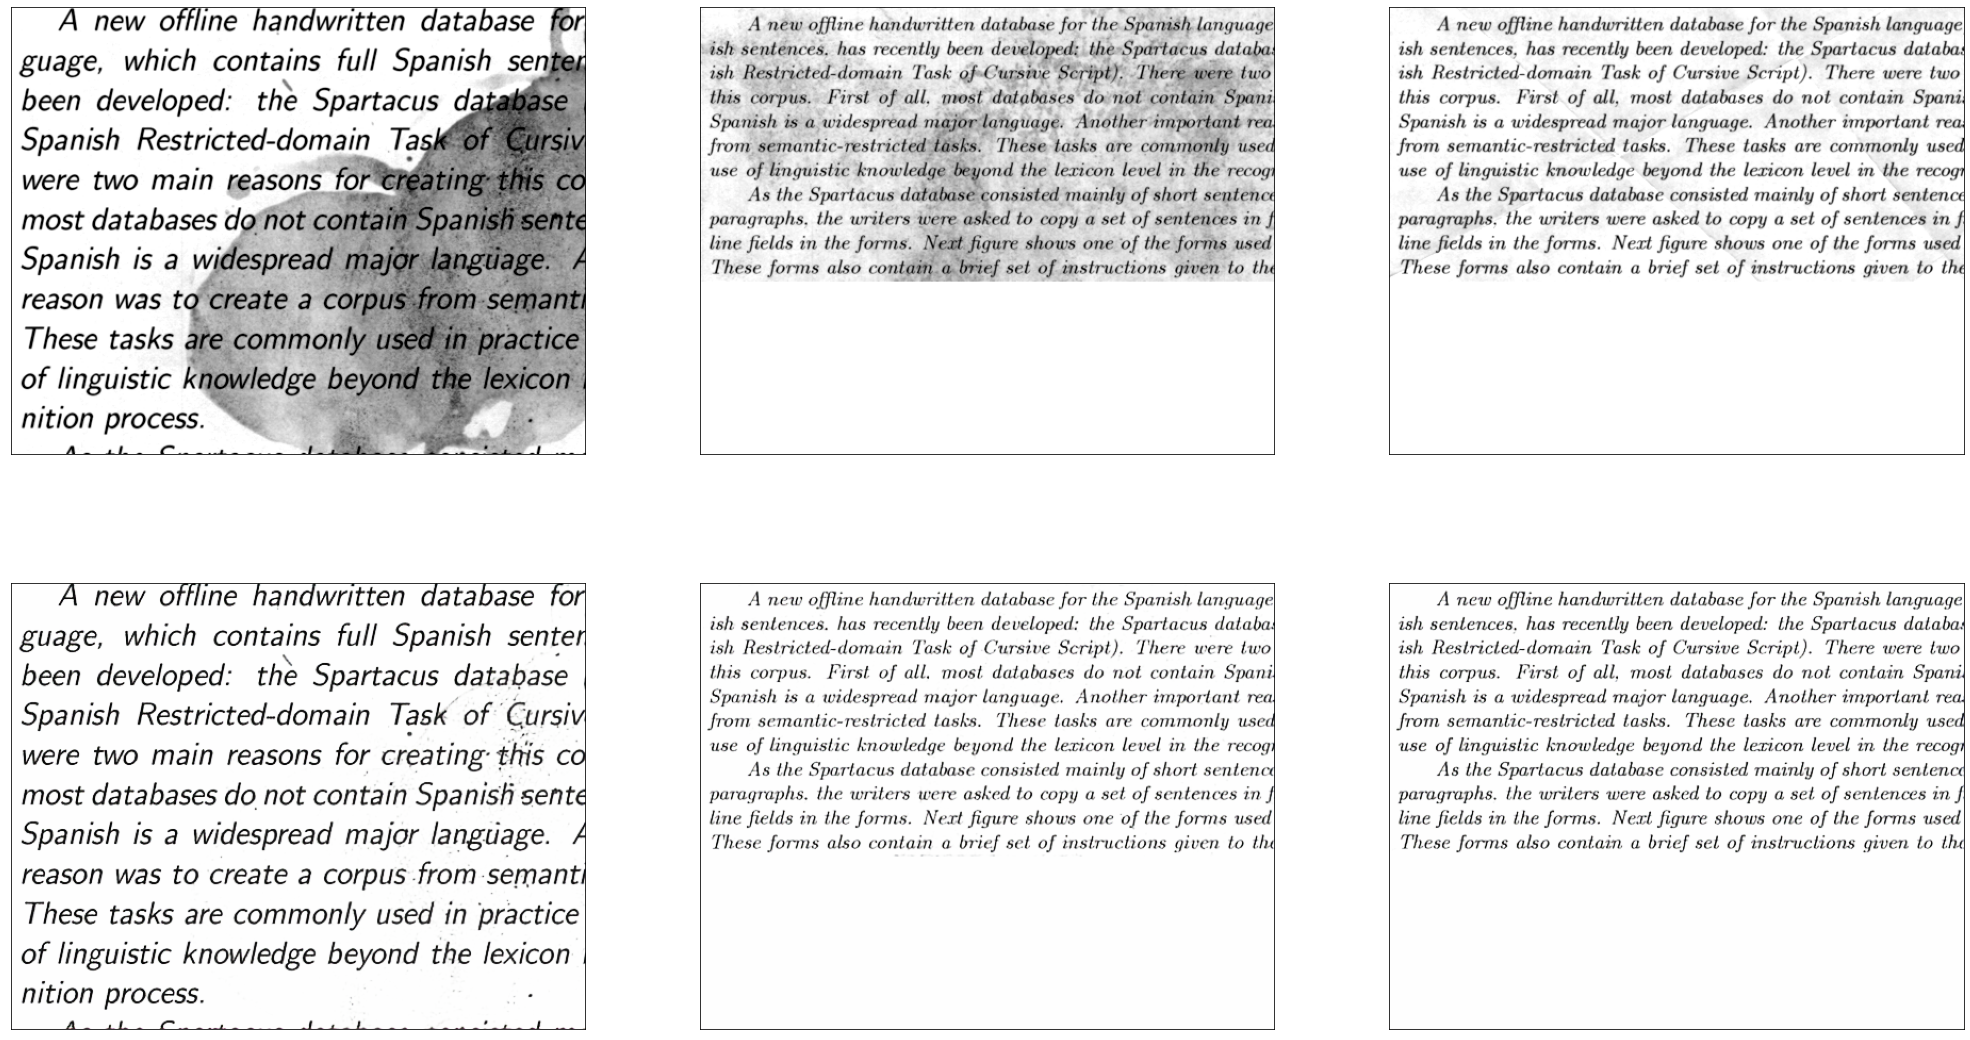

In [ ]:
# отобразим 3 оригинальных изображения и этиже 3 изображения, обработанные сетью
n = 3 
plt.figure(figsize=(35, 30))
for i in range(n):
  index = np.random.randint(0, pred.shape[0]) 
  ax = plt.subplot(3, n, i + 1) 
  plt.imshow(images_test[index].reshape(420,540,3), cmap='gray')
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(pred[index].reshape(420,540,3), cmap='gray') 
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()